In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('data.csv', parse_dates=['date'], index_col='date')
data = data.asfreq('D')
data.info()
data.to_excel("data.xlsx")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2015-01-01 to 2017-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


# EDA

In [53]:
data['day'] = data.index.day
data['month'] = data.index.month
data['week'] = data.index.isocalendar().week.astype(int)
data['dayofweek'] = data.index.dayofweek
data['dayofyear'] = data.index.dayofyear
data.head()

,y,day,month,week,dayofweek,dayofyear
date,,,,,,
2015-01-01,1111.336,1,1,1,3,1
2015-01-02,1300.884,2,1,1,4,2
2015-01-03,1265.271,3,1,1,5,3
2015-01-04,1198.854,4,1,1,6,4
2015-01-05,1449.861,5,1,2,0,5


In [54]:
data[['y']].head()

,y
date,
2015-01-01,1111.336
2015-01-02,1300.884
2015-01-03,1265.271
2015-01-04,1198.854
2015-01-05,1449.861


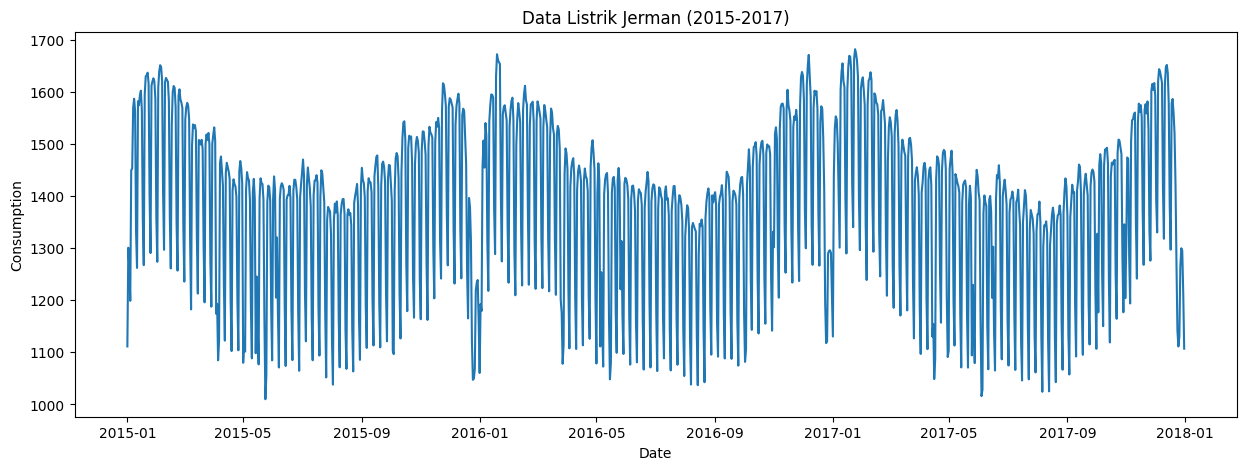

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data.y)
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Data Listrik Jerman (2015-2017)')
plt.show()


Text(0, 0.5, 'Consumption')

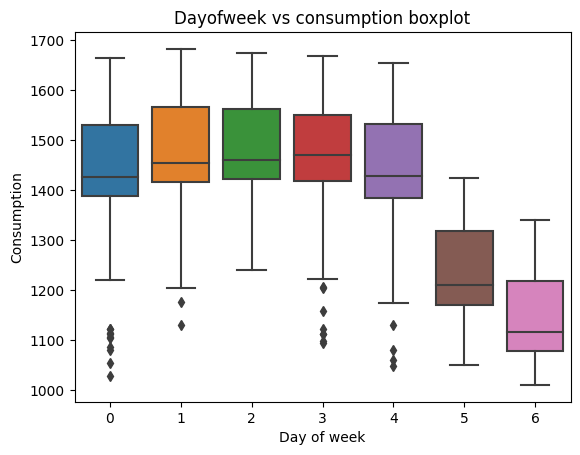

In [56]:
sns.boxplot(data, x="dayofweek", y='y')
plt.title('Dayofweek vs consumption boxplot')
plt.xlabel('Day of week')
plt.ylabel('Consumption')

Text(0, 0.5, 'Consumption')

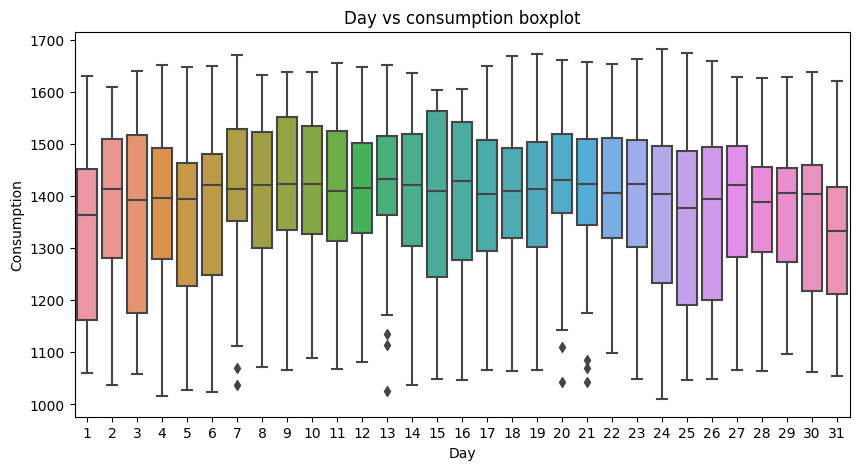

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="day", y='y')
plt.title('Day vs consumption boxplot')
plt.xlabel('Day')
plt.ylabel('Consumption')

Text(0, 0.5, 'Consumption')

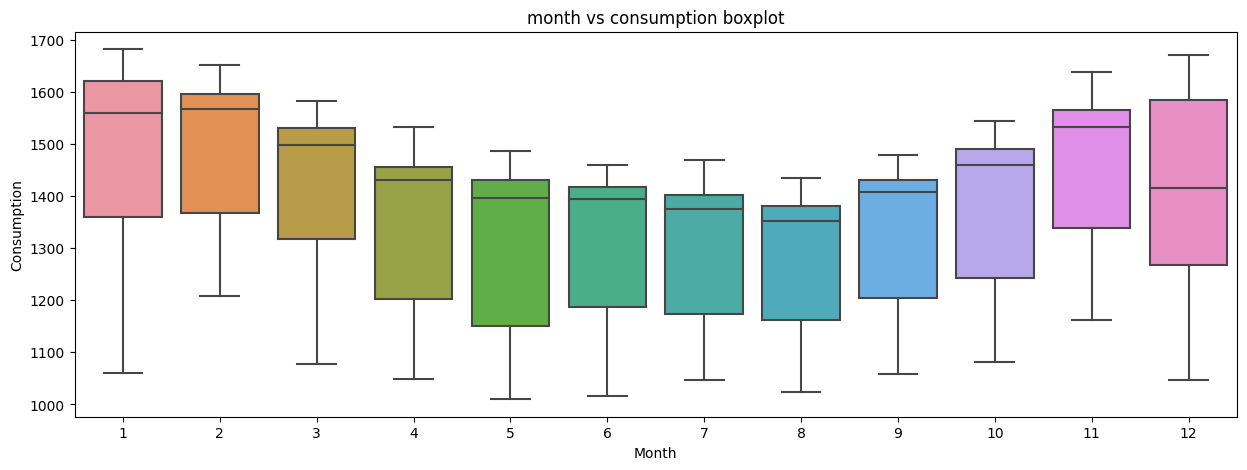

In [58]:
plt.figure(figsize=(15, 5))
sns.boxplot(data, x="month", y='y')
plt.title('month vs consumption boxplot')
plt.xlabel('Month')
plt.ylabel('Consumption')

Text(0, 0.5, 'Consumption')

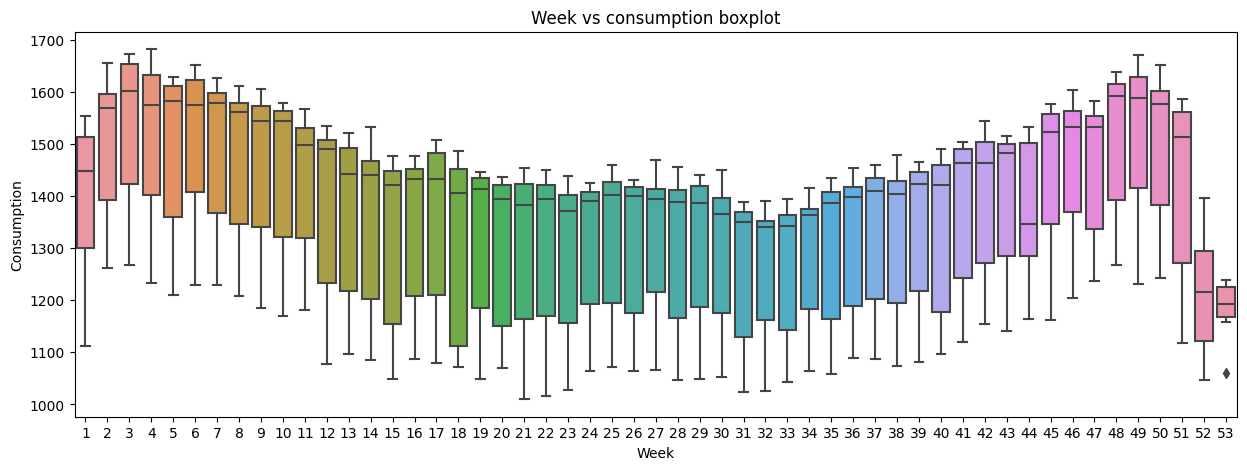

In [59]:
plt.figure(figsize=(15, 5))
sns.boxplot(data, x="week", y='y')
plt.title('Week vs consumption boxplot')
plt.xlabel('Week')
plt.ylabel('Consumption')

In [60]:
X = data.iloc[:, 1:]
y = data['y']

In [61]:
full_data = data.loc['2015-01-01':'2017-10-31']
len(full_data)

1035

# Split Dataset

In [62]:
full_data.head()

,y,day,month,week,dayofweek,dayofyear
date,,,,,,
2015-01-01,1111.336,1,1,1,3,1
2015-01-02,1300.884,2,1,1,4,2
2015-01-03,1265.271,3,1,1,5,3
2015-01-04,1198.854,4,1,1,6,4
2015-01-05,1449.861,5,1,2,0,5


In [63]:
train_val_test = []
for i in range(32):
    train_val_test.append(
        (
            (X.iloc[i:(1035 - 30 + i)], y.iloc[i:(1035 - 30 + i)]), 
            (X.iloc[(1035 - 30 + i):(1035+i)], y.iloc[(1035 - 30 + i):(1035+i)]),
            (X.iloc[(1035 + i):(1035 + 30 + i)], y.iloc[(1035 + i):(1035 + 30 + i)])
        )
    )

# Model with Validation

In [139]:
(X_train_0, y_train_0), (X_val_0, y_val_0), (X_test_0, y_test_0) = train_val_test[-1]
X_test_0

,day,month,week,dayofweek,dayofyear
date,,,,,
2017-12-02,2,12,48,5,336
2017-12-03,3,12,48,6,337
2017-12-04,4,12,49,0,338
2017-12-05,5,12,49,1,339
2017-12-06,6,12,49,2,340
2017-12-07,7,12,49,3,341
2017-12-08,8,12,49,4,342
2017-12-09,9,12,49,5,343
2017-12-10,10,12,49,6,344


## XGBoost

In [140]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

model_xgb = xgb.XGBRegressor(n_estimators=5000, early_stopping_rounds=50, random_state=42, eval_metric='mape')
model_xgb.fit(X_train_0, y_train_0, eval_set=[(X_val_0, y_val_0)], verbose=False)

y_train_val_test_0 = np.concatenate((y_train_0, y_val_0, y_test_0))

fitted_value_train_0 = model_xgb.predict(X_train_0)
fitted_value_val_0 = model_xgb.predict(X_val_0)
fitted_value_test_0 = model_xgb.predict(X_test_0)
fitted_value_0 = np.concatenate((fitted_value_train_0, fitted_value_val_0, fitted_value_test_0))

resid_train_0 = y_train_0 - fitted_value_train_0
resid_val_0 = y_val_0 - fitted_value_val_0
resid_test_0 = y_test_0 - fitted_value_test_0
resid_0 = np.concatenate((resid_train_0, resid_val_0, resid_test_0))

np.round(np.abs(resid_0) / y_train_val_test_0, 4) * 100

array([0.13, 0.  , 0.13, ..., 1.29, 0.43, 4.87])

In [144]:
fitted_value_df = pd.DataFrame()
resid_df = pd.DataFrame()
ape_df = pd.DataFrame()

for (i, (((X_train, y_train), (X_val, y_val), (X_test, y_test)))) in enumerate(train_val_test):
    model_xgb = xgb.XGBRegressor(n_estimators=500000, early_stopping_rounds=100, random_state=42)
    model_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    y_train_val_test = np.concatenate((y_train, y_val, y_test))
    
    fitted_value_train = model_xgb.predict(X_train)
    fitted_value_val = model_xgb.predict(X_val)
    fitted_value_test = model_xgb.predict(X_test)
    fitted_value = np.concatenate((fitted_value_train, fitted_value_val, fitted_value_test))
    
    resid_train = y_train - fitted_value_train
    resid_val = y_val - fitted_value_val
    resid_test = y_test - fitted_value_test
    resid = np.concatenate((resid_train, resid_val, resid_test))
    
    ape = np.round(np.abs(resid) / y_train_val_test, 4) * 100
    
    fitted_value_i_df = pd.Series(fitted_value).reset_index(drop=True).to_frame(f'Model {i+1}')
    resid_i_df = pd.Series(resid).reset_index(drop=True).to_frame(f'Model {i+1}')
    ape_i_df = pd.Series(ape).reset_index(drop=True).to_frame(f'Model {i+1}')
    
    fitted_value_df = pd.concat([fitted_value_df, fitted_value_i_df], axis=1)
    resid_df = pd.concat([resid_df, resid_i_df], axis=1)
    ape_df = pd.concat([ape_df, ape_i_df], axis=1)
    
fitted_value_df.to_excel("Baru_Fitted Value XGBoost.xlsx")
resid_df.to_excel("Baru_Residu XGBoost.xlsx")
ape_df.to_excel("Baru_APE XGBoost.xlsx")

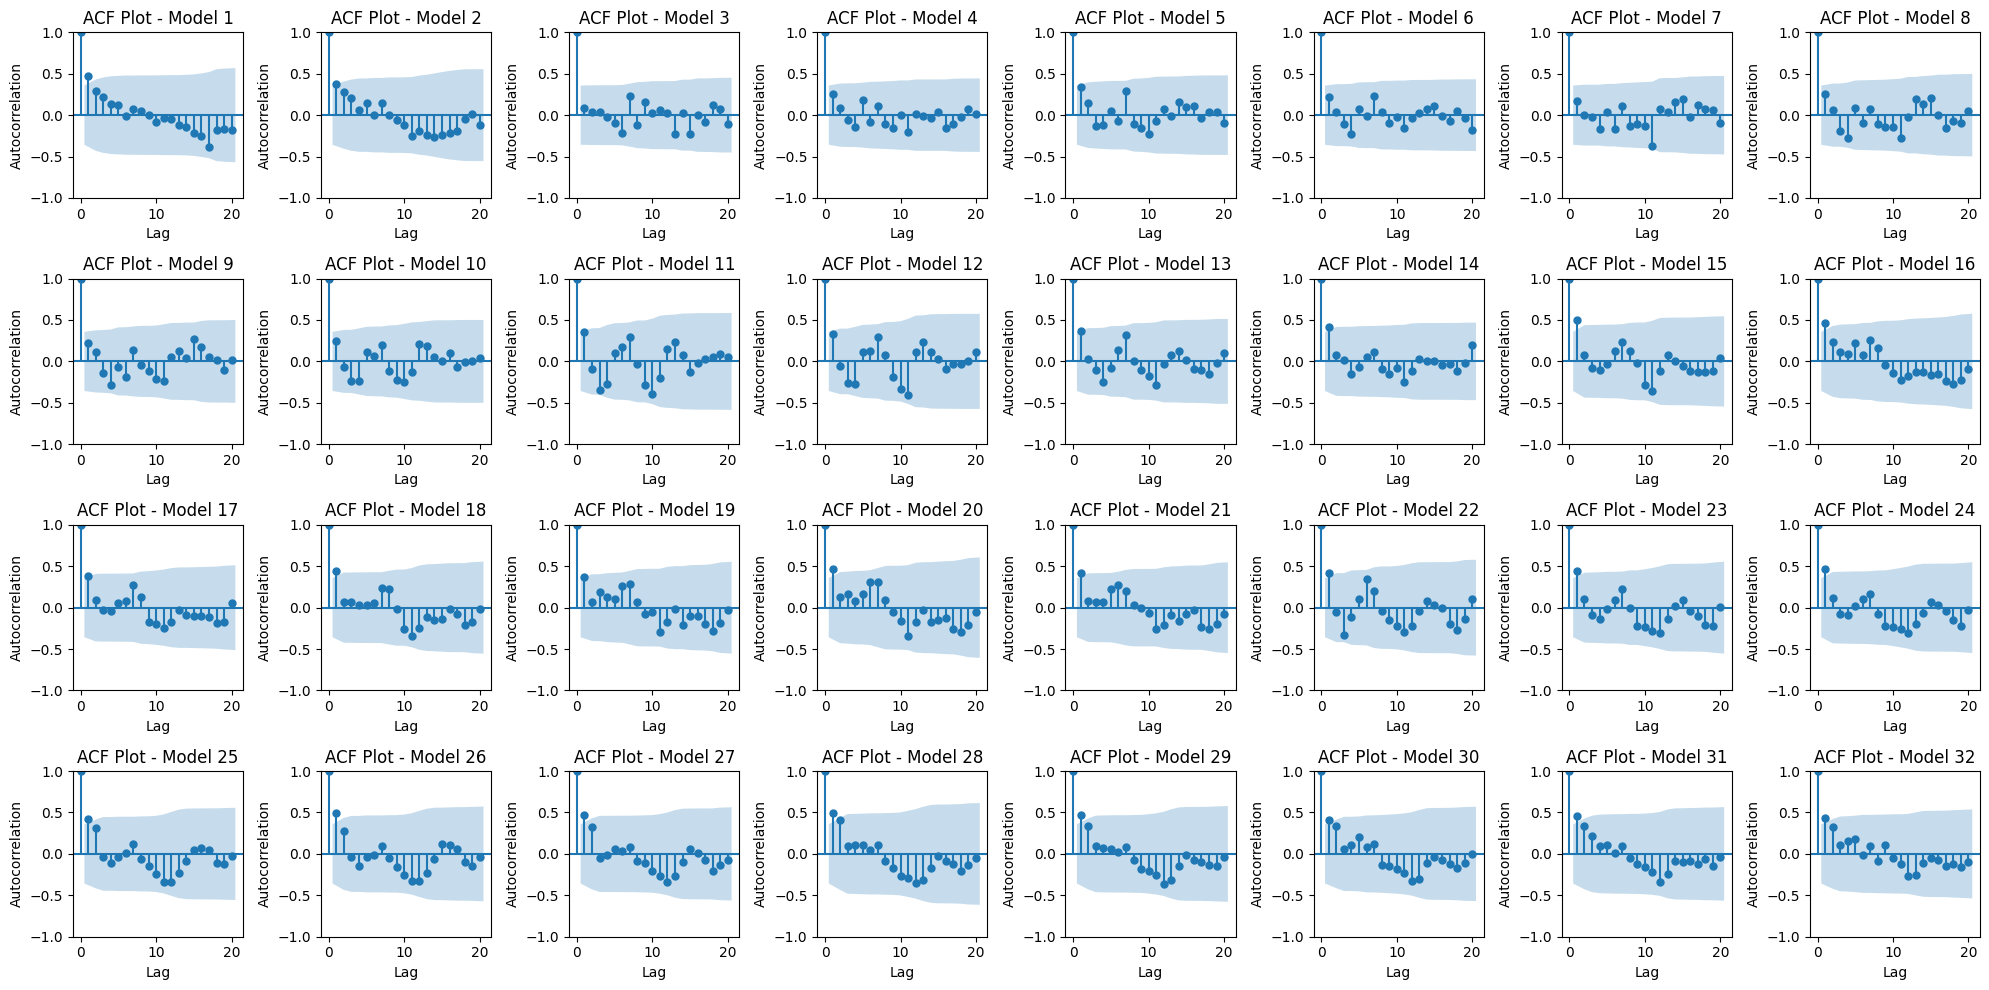

In [149]:
from statsmodels.graphics.tsaplots import plot_acf

# Get the last 30 data points
last_30_data = resid_df.iloc[-30:]

# Create the ACF plot with subplots
fig, axes = plt.subplots(4, 8, figsize=(20, 10))

# Iterate over each column (model) in the dataframe
for i, col in enumerate(last_30_data.columns):
    # Get the residuals for the current model
    residuals = last_30_data[col]
    
    # Plot the ACF for the current model
    ax = axes[i // 8, i % 8]
    plot_acf(residuals, lags=20, ax=ax)
    ax.set_title(f"ACF Plot - {col}")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()


# Modelling

## XGBoost

### Fit Model

In [47]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=1000, eval_metric='mape')
fitted_df = pd.DataFrame()
ape_test_df = pd.DataFrame()
i = 0

for (X_train, y_train), (X_test, y_test) in train_val_test:
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
    
    fitted_train = pd.Series(model.predict(X_train))
    fitted_test = pd.Series(model.predict(X_test))

    series = pd.concat([fitted_train, fitted_test]).reset_index(drop=True).to_frame(f"{i+1}")
    fitted_df = pd.concat([fitted_df, series], axis=1)
    
    ape = np.abs(y_test - model.predict(X_test)) / y_test
    ape_series = pd.Series(ape).reset_index(drop=True).to_frame(f"{i+1}")
    ape_test_df = pd.concat([ape_test_df, ape_series], axis=1)
    
    i += 1

fitted_df.to_excel("fitted_xgboost.xlsx", index=False)
ape_test_df.to_excel("mape_xgboost.xlsx", index=False)

### Cek Residu

#### ACF PLOT

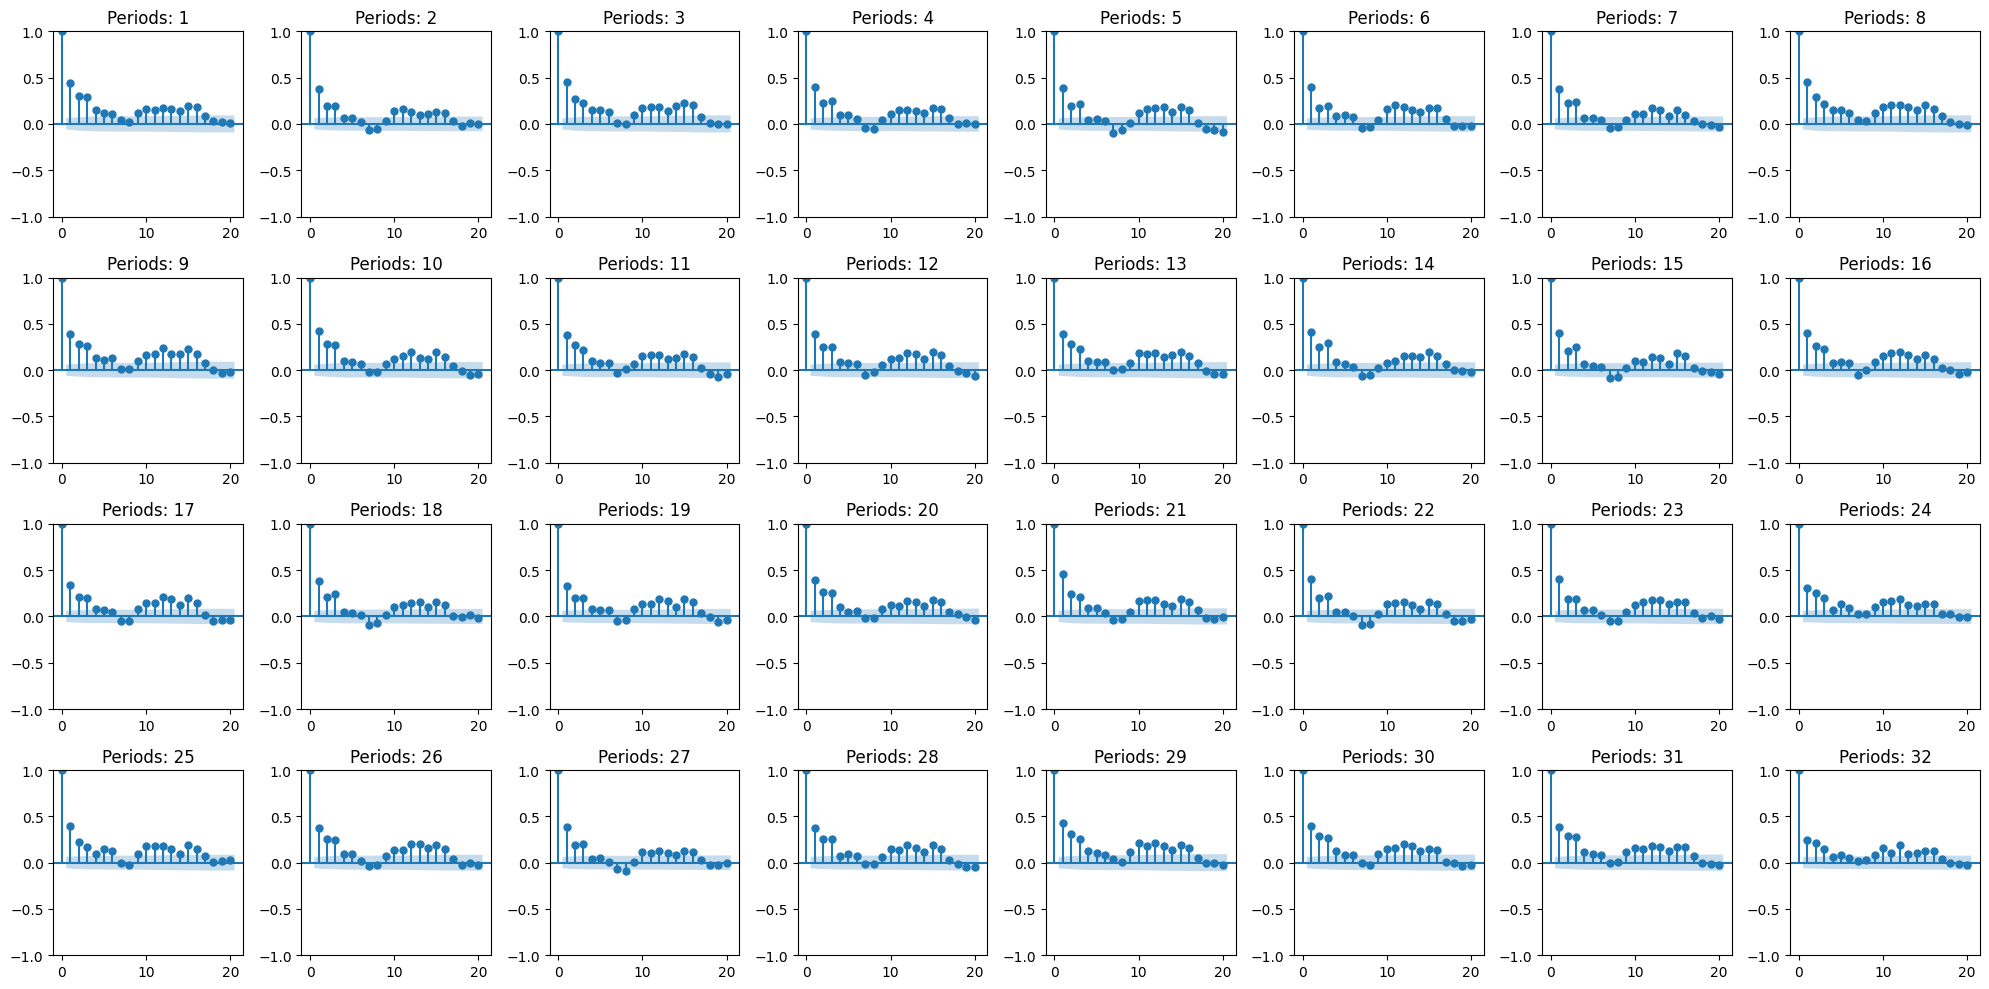

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, eval_metric='mape')
mape_df = pd.DataFrame()
fitted_df = pd.DataFrame()
i = 0

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for (X_train, y_train), (X_test, y_test) in train_test:
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
    
    fitted_train = model.predict(X_train)
    fitted_test = model.predict(X_test)
    
    resid = y_train - fitted_train
    
    ax = axes[i // 8, i % 8]
    plot_acf(resid, lags=20, ax=ax)
    ax.set_title(f"Periods: {i+1}")
    
    i += 1

plt.tight_layout()
plt.show()


#### PACF Plot

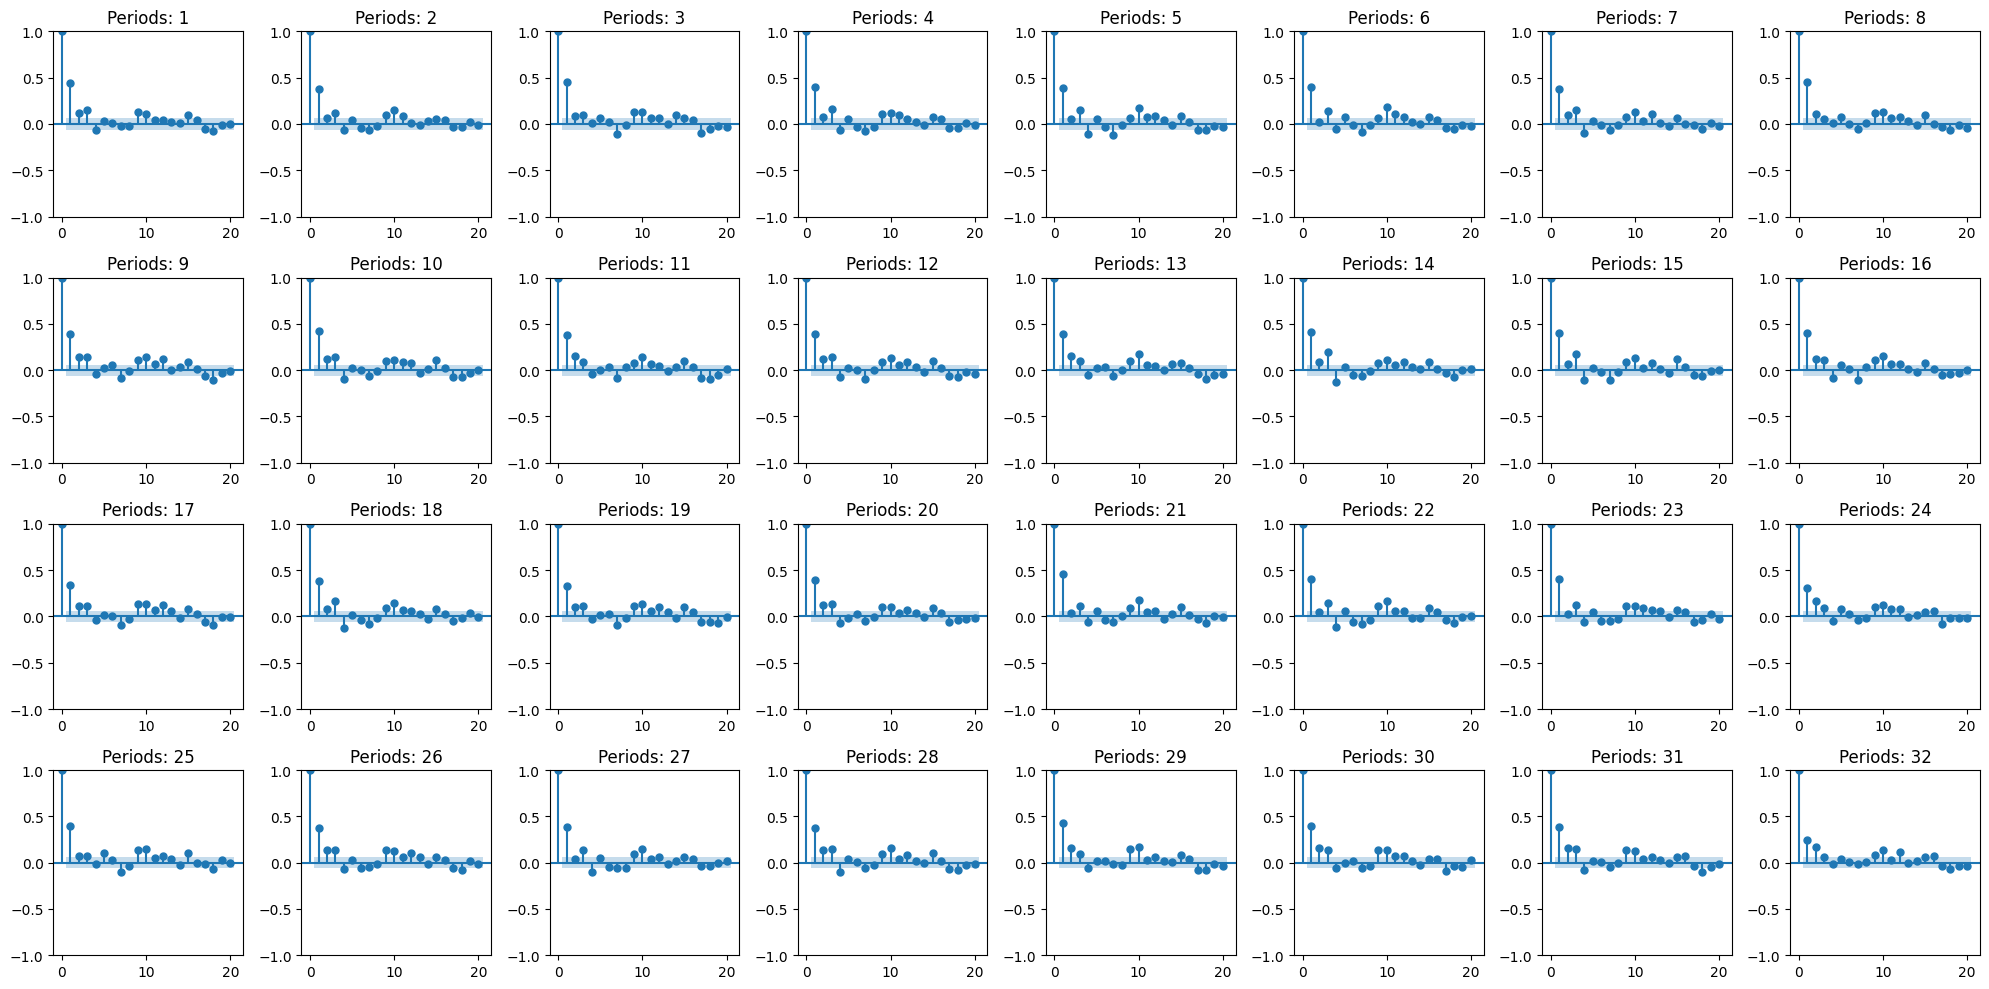

In [20]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, eval_metric='mape')
mape_df = pd.DataFrame()
fitted_df = pd.DataFrame()
i = 0

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for (X_train, y_train), (X_test, y_test) in train_test:
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
    
    fitted_train = model.predict(X_train)
    fitted_test = model.predict(X_test)
    
    resid = y_train - fitted_train
    
    ax = axes[i // 8, i % 8]
    plot_pacf(resid, lags=20, ax=ax)
    ax.set_title(f"Periods: {i+1}")
    
    i += 1

plt.tight_layout()
plt.show()

### Feature Importances

In [21]:
model = xgb.XGBRegressor(n_estimators=150, eval_metric='mape')
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mape', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
features = model.feature_names_in_
importance_values = np.round(model.feature_importances_, 3)

xgboost_importance = pd.DataFrame({'Feature': features, 'Importance': importance_values}).sort_values(by='Importance', ascending=False)
xgboost_importance

,Feature,Importance
3,dayofweek,0.711
4,dayofyear,0.122
2,week,0.091
1,month,0.047
0,day,0.028


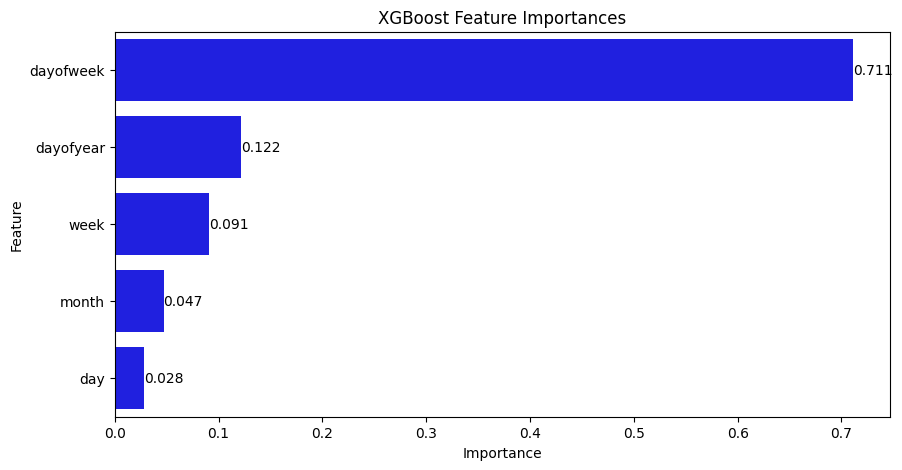

In [17]:
plt.figure(figsize=(10, 5))
plt.title("XGBoost Feature Importances")
sns.barplot(xgboost_importance, x="Importance", y="Feature", color='b')
for i, mape in enumerate(xgboost_importance['Importance']):
    plt.text(mape, i, str(np.round(mape, 3)), ha='left', va='center')

## Random Forest

### Fit Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
fitted_df = pd.DataFrame()
i = 0

for (X_train, y_train), (X_test, y_test) in train_test:
    model.fit(X_train, y_train)
    
    fitted_train = pd.Series(model.predict(X_train))
    fitted_test = pd.Series(model.predict(X_test))
    
    series = pd.concat([fitted_train, fitted_test]).reset_index(drop=True).to_frame(f"{i+1}")
    fitted_df = pd.concat([fitted_df, series], axis=1)
    
    i += 1
    
fitted_df.to_excel("fitted_randomforest.xlsx", index=False)

### Cek Residu

#### ACF PLOT

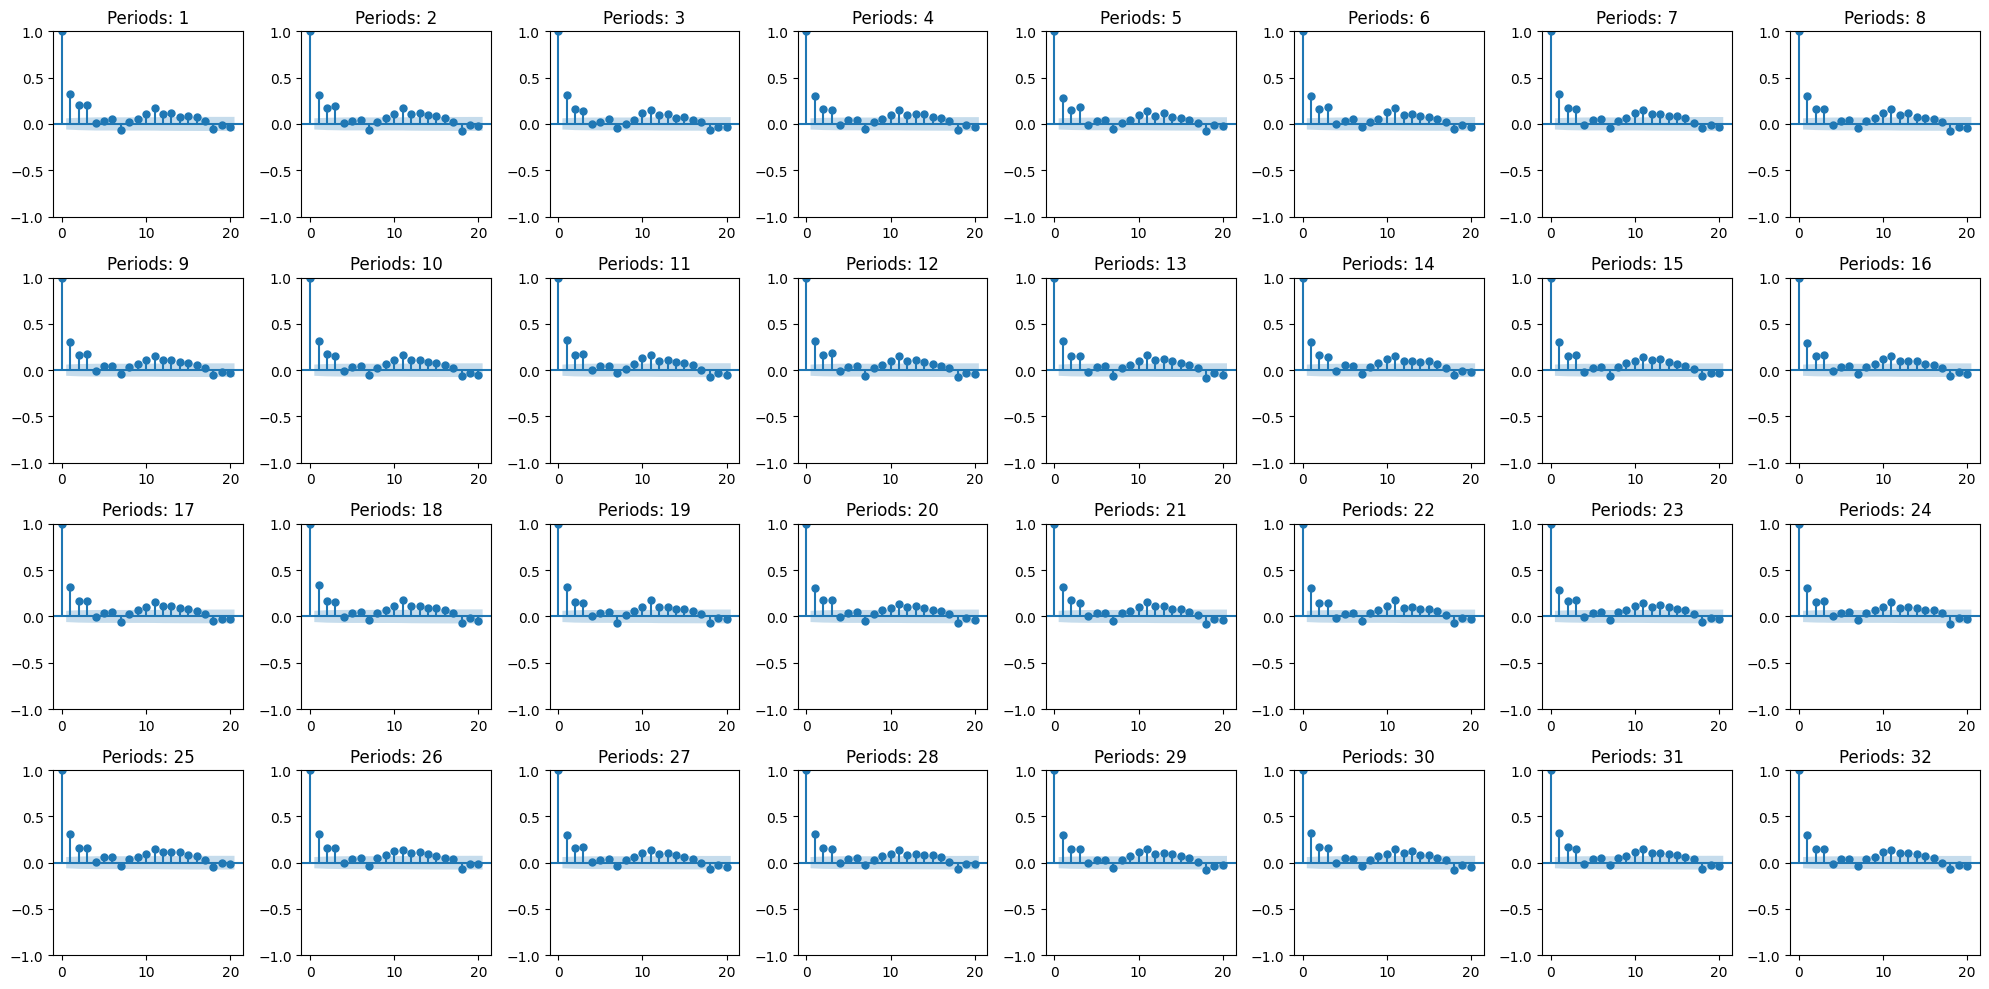

In [29]:
model = RandomForestRegressor(random_state=42)
i = 0

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for (X_train, y_train), (X_test, y_test) in train_test:
    model.fit(X_train, y_train)
    
    fitted_train = model.predict(X_train)
    fitted_test = model.predict(X_test)
    
    resid = y_train - fitted_train
    
    ax = axes[i // 8, i % 8]
    plot_acf(resid, lags=20, ax=ax)
    ax.set_title(f"Periods: {i+1}")
    
    i += 1

plt.tight_layout()
plt.show()


#### PACF Plot

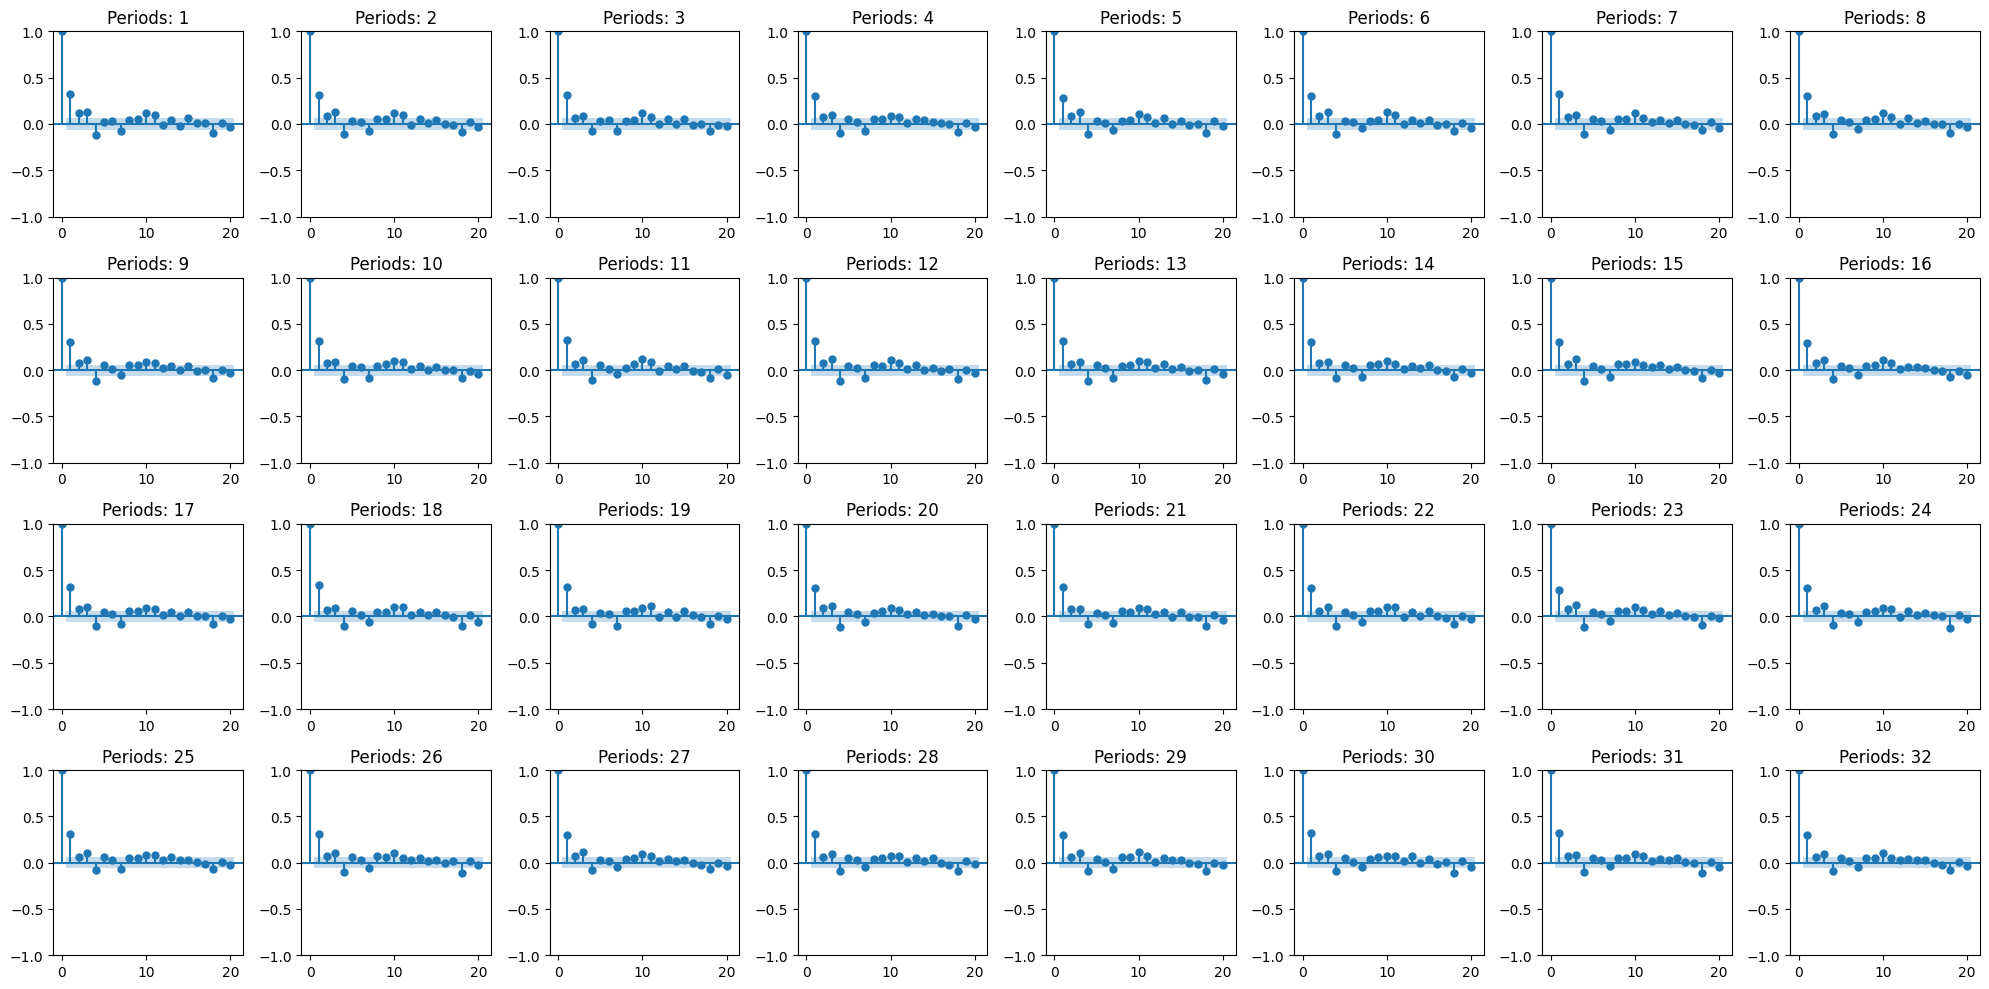

In [30]:
model = RandomForestRegressor(random_state=42)
i = 0

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for (X_train, y_train), (X_test, y_test) in train_test:
    model.fit(X_train, y_train)
    
    fitted_train = model.predict(X_train)
    fitted_test = model.predict(X_test)
    
    resid = y_train - fitted_train
    
    ax = axes[i // 8, i % 8]
    plot_pacf(resid, lags=20, ax=ax)
    ax.set_title(f"Periods: {i+1}")
    
    i += 1

plt.tight_layout()
plt.show()


## LGBM

### Fit Model

In [32]:
import lightgbm as lgbm

params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': 0,
    'force_col_wise': 'true'
}

fitted_df = pd.DataFrame()
i = 0

for (X_train, y_train), (X_test, y_test) in train_test:
    train_data = lgbm.Dataset(X_train, label=y_train)
    eval_data = lgbm.Dataset(X_test, label=y_test, reference=train_data)

    best = lgbm.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, eval_data],
        valid_names=['train', 'eval'],
        callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(0)]
    )
    
    fitted_train = pd.Series(best.predict(X_train, num_iteration=best.best_iteration))
    fitted_test = pd.Series(best.predict(X_test, num_iteration=best.best_iteration))
    
    series = pd.concat([fitted_train, fitted_test]).reset_index(drop=True).to_frame(f"{i+1}")
    fitted_df = pd.concat([fitted_df, series], axis=1)
    
    i += 1
    
fitted_df.to_excel("fitted_lgbm.xlsx", index=False)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 1375.15	eval's l2: 1212.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 868.717	eval's l2: 487.113
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	train's l2: 1131.71	eval's l2: 668.233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[438]	train's l2: 354.488	eval's l2: 501.332
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	train's l2: 391.359	eval's l2: 572.217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	train's l2: 646.707	eval's l2: 606.588
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 703.873	eval's l2: 599.206
Training until 

### Cek Residu

#### ACF PLOT

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 1375.15	eval's l2: 1212.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 868.717	eval's l2: 487.113
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	train's l2: 1131.71	eval's l2: 668.233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[438]	train's l2: 354.488	eval's l2: 501.332
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	train's l2: 391.359	eval's l2: 572.217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	train's l2: 646.707	eval's l2: 606.588
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 703.873	eval's l2: 599.206
Training until 

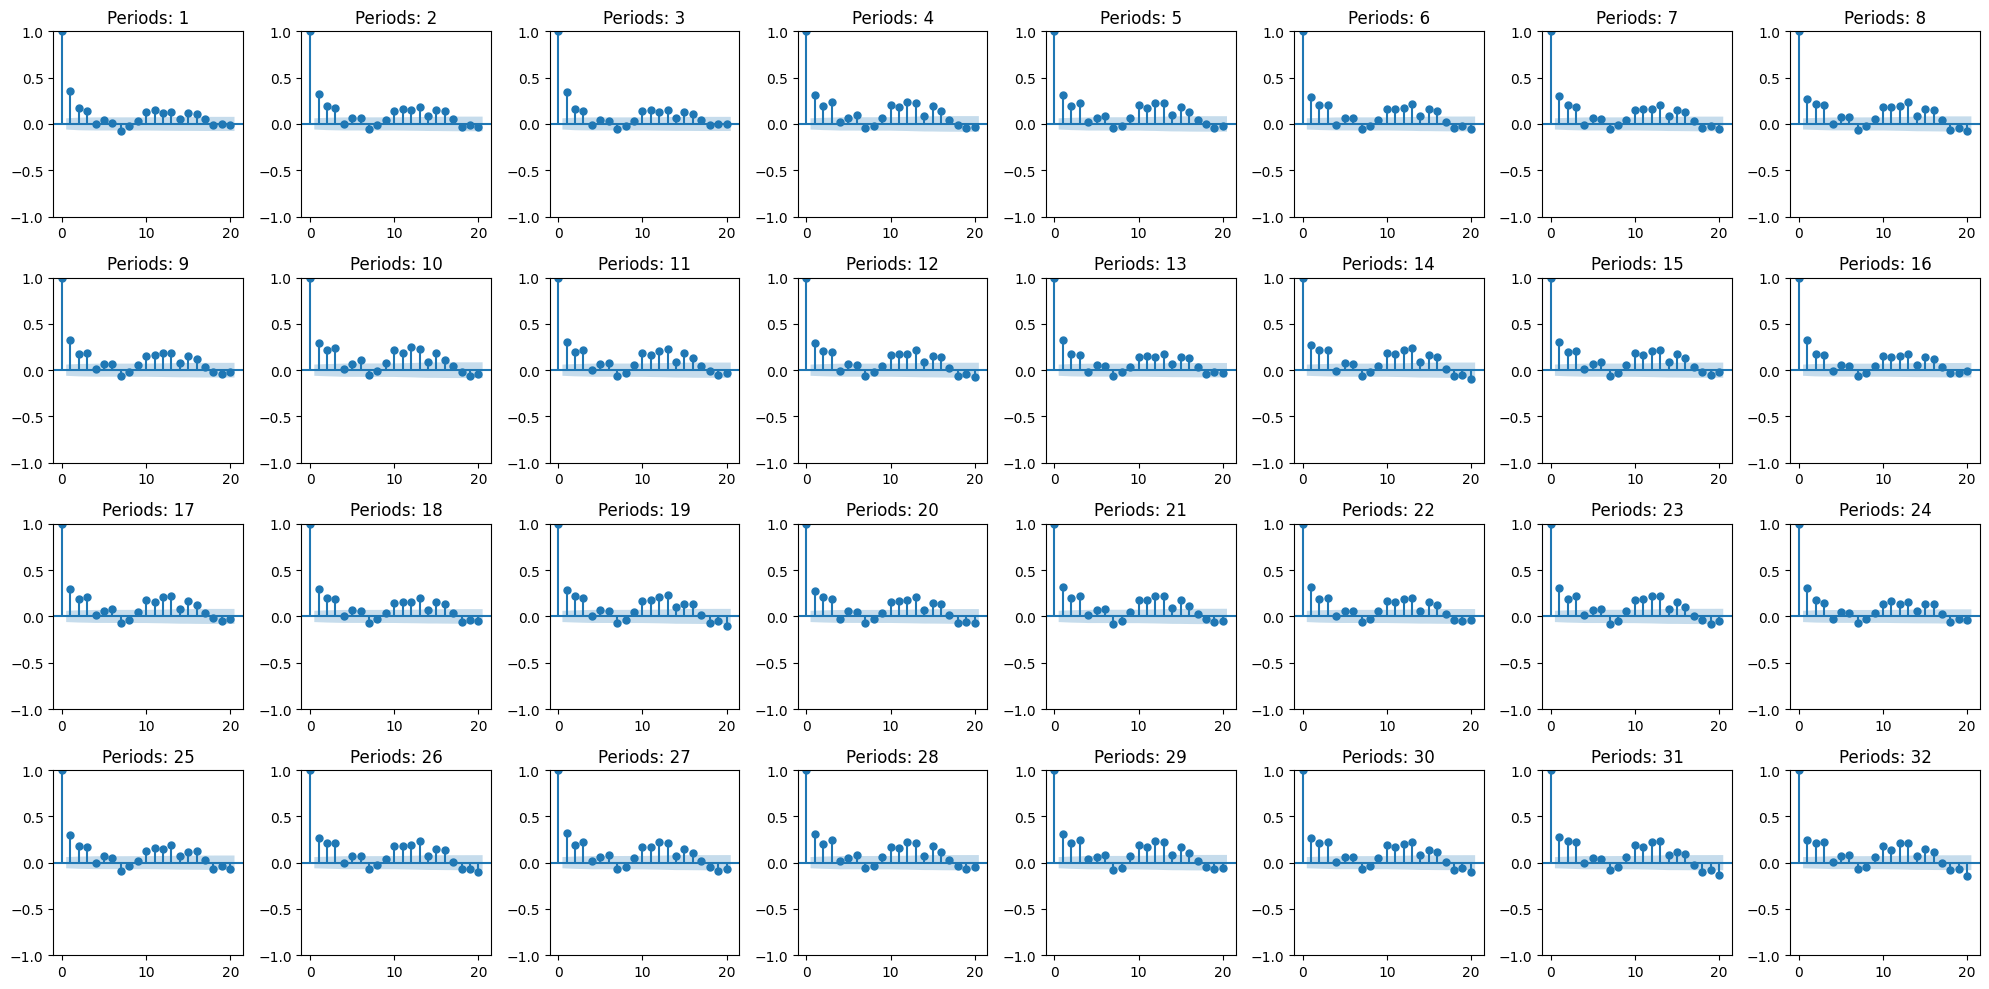

In [33]:
i = 0

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': 0,
    'force_col_wise': 'true'
}

fitted_df = pd.DataFrame()
i = 0

for (X_train, y_train), (X_test, y_test) in train_test:
    train_data = lgbm.Dataset(X_train, label=y_train)
    eval_data = lgbm.Dataset(X_test, label=y_test, reference=train_data)

    best = lgbm.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, eval_data],
        valid_names=['train', 'eval'],
        callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(0)]
    )
    
    fitted_train = best.predict(X_train, num_iteration=best.best_iteration)
    fitted_test = best.predict(X_test, num_iteration=best.best_iteration)
    
    resid = y_train - fitted_train
    
    ax = axes[i // 8, i % 8]
    plot_acf(resid, lags=20, ax=ax)
    ax.set_title(f"Periods: {i+1}")
    
    i += 1

plt.tight_layout()
plt.show()


#### PACF Plot

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	train's l2: 1375.15	eval's l2: 1212.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[167]	train's l2: 868.717	eval's l2: 487.113
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	train's l2: 1131.71	eval's l2: 668.233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[438]	train's l2: 354.488	eval's l2: 501.332
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[399]	train's l2: 391.359	eval's l2: 572.217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	train's l2: 646.707	eval's l2: 606.588
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	train's l2: 703.873	eval's l2: 599.206
Training until 

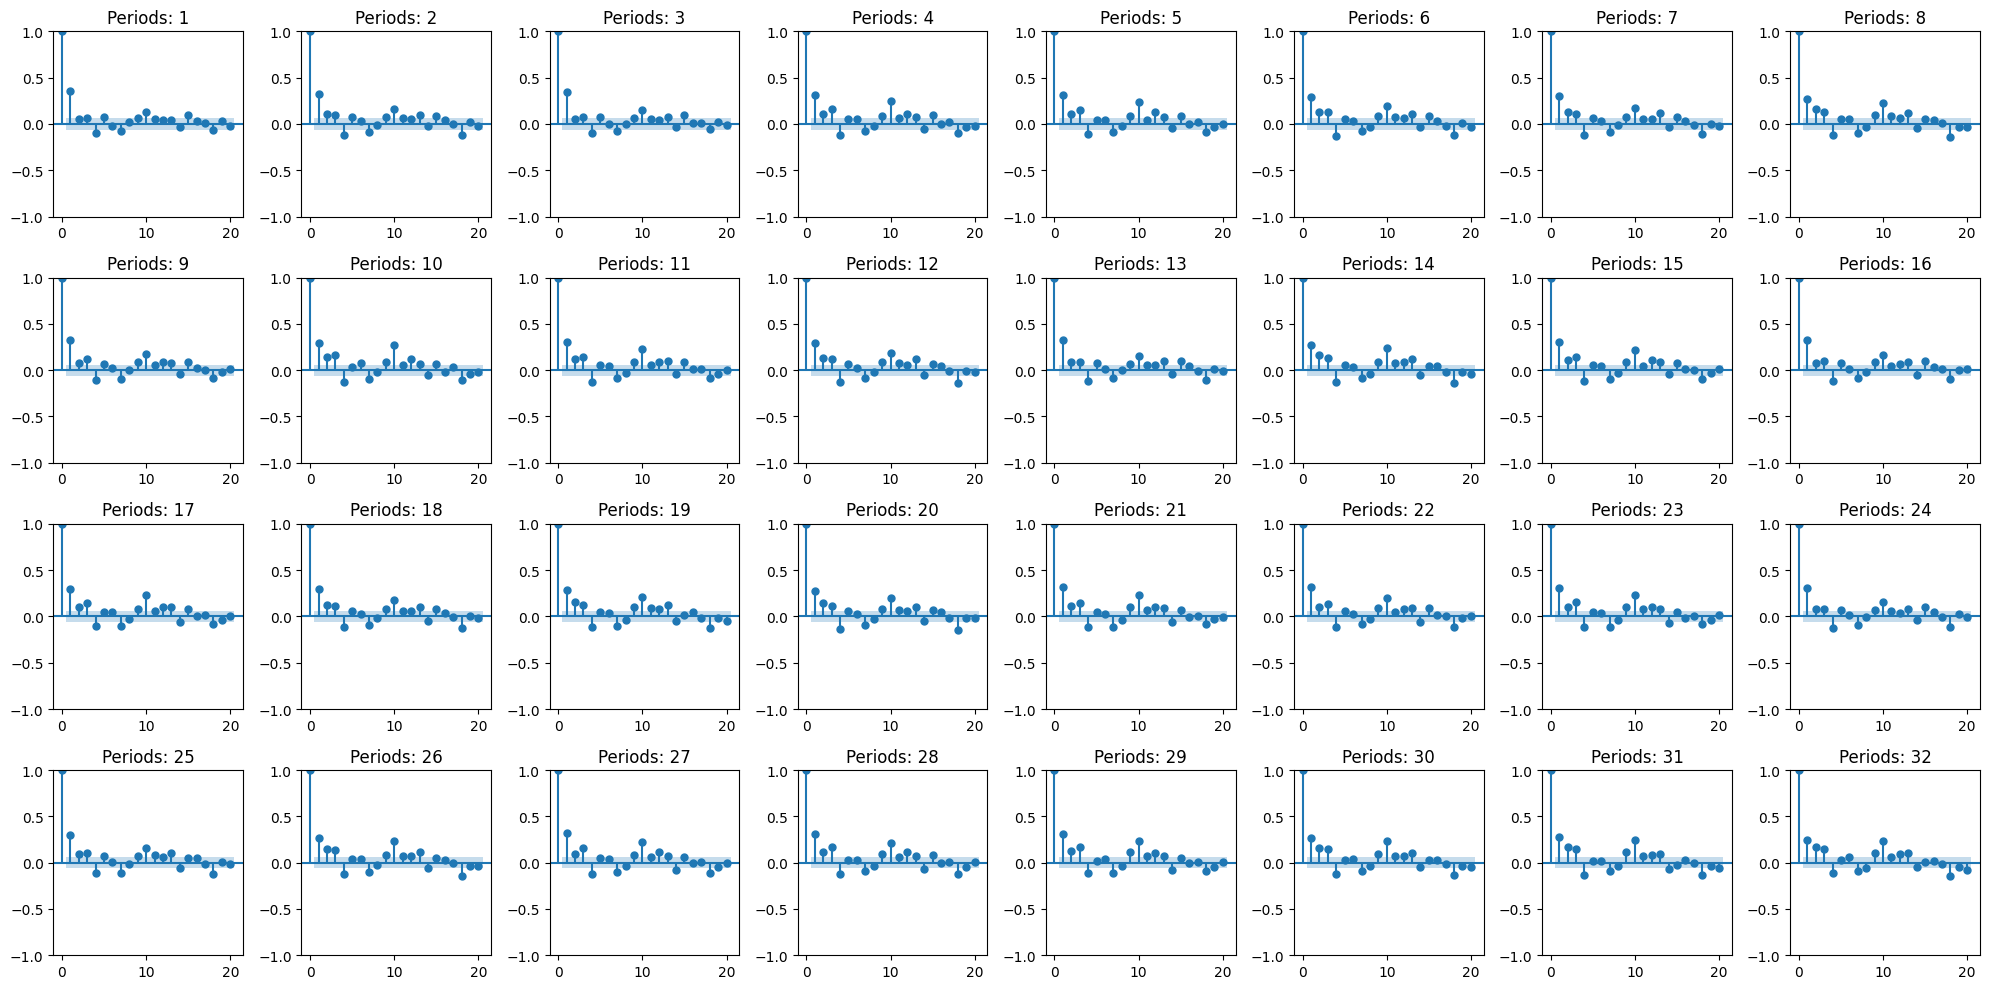

In [35]:
i = 0

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': 0,
    'force_col_wise': 'true'
}

fitted_df = pd.DataFrame()
i = 0

for (X_train, y_train), (X_test, y_test) in train_test:
    train_data = lgbm.Dataset(X_train, label=y_train)
    eval_data = lgbm.Dataset(X_test, label=y_test, reference=train_data)

    best = lgbm.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, eval_data],
        valid_names=['train', 'eval'],
        callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(0)]
    )
    
    fitted_train = best.predict(X_train, num_iteration=best.best_iteration)
    fitted_test = best.predict(X_test, num_iteration=best.best_iteration)
    
    resid = y_train - fitted_train
    
    ax = axes[i // 8, i % 8]
    plot_pacf(resid, lags=20, ax=ax)
    ax.set_title(f"Periods: {i+1}")
    
    i += 1

plt.tight_layout()
plt.show()


## CatBoost

In [ ]:
import catboost as cb
from sklearn.metrics import mean_absolute_error


model_cb = cb.CatBoostRegressor()
fitted_df = pd.DataFrame()
mape_test_df = pd.DataFrame()
i = 0

for (X_train, y_train), (X_test, y_test) in train_test:
    model_cb.fit(X_train, y_train, use_best_model=True, eval_set=(X_test, y_test), verbose=False, early_stopping_rounds=50)
    
    fitted_train = pd.Series(model_cb.predict(X_train))
    fitted_test = pd.Series(model_cb.predict(X_test))

    series = pd.concat([fitted_train, fitted_test]).reset_index(drop=True).to_frame(f"{i+1}")
    fitted_df = pd.concat([fitted_df, series], axis=1)
    
    mape_test = (np.abs(y_test - model_cb.predict(X_test)) / y_test) * 100
    mape_test_series = pd.Series(mape_test).reset_index(drop=True).to_frame(f"{i+1}")
    mape_test_df = pd.concat([mape_test_df, mape_test_series], axis=1)
    
    
    i += 1

In [41]:
fitted_df.to_excel("fitted_catboost.xlsx", index=False)
mape_test_df.to_excel("mape_catboost_test.xlsx", index=False)